# Cyber Security

**Problem Statement:**

Book-My-Show will enable the ads on their website, but they are also very cautious about their user privacy and information who visit their website. Some ads URL could contain a malicious link that can trick any recipient and lead to a malware installation, freezing the system as part of a ransomware attack or revealing sensitive information. Book-My-Show now wants to analyze that whether the particular URL is prone to phishing (malicious) or not.

The input dataset contains an 11k sample corresponding to the 11k URL. Each sample contains 32 features that give a different and unique description of URL ranging from -1,0,1.

 -1: Phishing

 0: Suspicious

 1: Legitimate

The sample could be either legitimate or phishing.

### Exploratory Data Analysis

In [113]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, model_selection
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Import dataset 
df = pd.read_csv('dataset.csv')

In [3]:
# Info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

There are 31 independent variables (integers) and one dependent variable (integers).

In [131]:
# Descriptive Statistics
df.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the data is scaled as it is either -1,0, or 1.

In [5]:
# Null Values
df.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

There are no missing values.

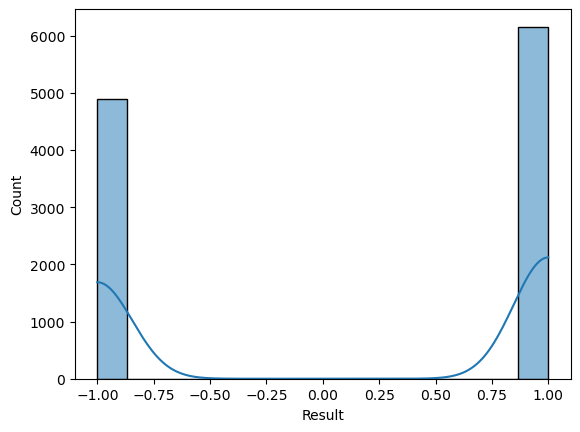

In [55]:
# Distribution of Results
sns.histplot(df['Result'],kde=True)
plt.show()

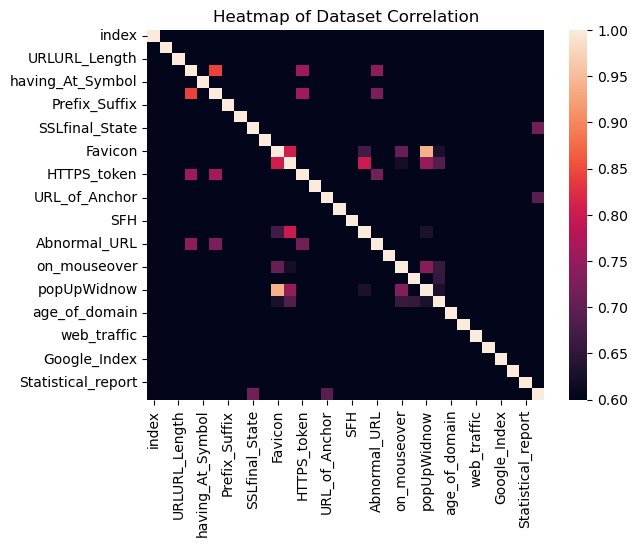

In [138]:
# Correlation of Columns
cor = df.corr()
# Visualize Correlations on a heatmap
sns.heatmap(cor, vmin=0.6, annot=False)
plt.title("Heatmap of Dataset Correlation")
plt.show()

In [141]:
# Create function to remove specified features
def remove_correlated_features(data, threshold):
    # Compute the correlation matrix
    corr_matrix = data.corr().abs()

    # Create a mask to identify highly correlated features
    mask = corr_matrix.mask(~(corr_matrix > threshold), other=0.0)

    # Find the correlated feature pairs
    correlated_pairs = [(col1, col2) for col1 in mask.columns for col2 in mask.columns if mask.loc[col1, col2] != 0.0]

    # Remove one feature from each correlated pair
    for feature1, feature2 in correlated_pairs:
        if feature1 != feature2:
            if feature1 in data.columns:
                data.drop(feature1, axis=1, inplace=True)

    return data
# Create a copy
data = df.copy()
# Set the correlation threshold
correlation_threshold = 0.6

# Remove correlated features
data = remove_correlated_features(data, correlation_threshold)

In [142]:
# See shape of new dataset
data.shape

(11055, 16)

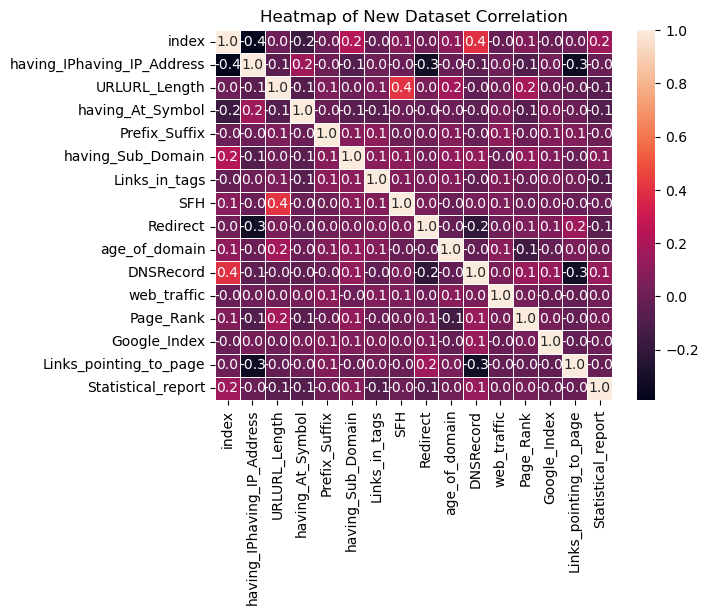

In [144]:
# Find Correlation and Visualize it 
sns.heatmap(data.corr(), annot=True, fmt=".1f", linewidth=.5)
plt.title("Heatmap of New Dataset Correlation")
plt.show()

### Feature Selection

In [9]:
# Create Variables
X = data
y = df['Result']

In [22]:
# Split data variables into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Logistic Regression

This model is used to analyze independent variables and produce a binary outcome. In this model, the URLs are classified as 0 (Phishing) or 1 (Legitimate). This binary model uses maximum likelihood estimation to determine the probability distribution of the outcomes. If the predictive probability is above the threshold (0.5) then it is assigned to as a 1 and if the probability is below the threshold, it is assigned as 0. In this dataset, the values are already in a 0 or 1 form. 

##### Evaluation Metrics:

1. Accuracy Score - Measures how well the model fits by measuring the proportion of correclty classified to the total amount of samples.
2. Precision Score - Metric measuring proportion of correctly predicted positive samples out of the total samples predicted as positive.
3. Recall Score - Measures the true positive rate which is the proportion of the actual positive samples correctly identified. 
4. F1 Score - This is a combination of the precesion & recall scores that signifies both the accuracy and coverage of the model's performance.
5. Confusion Matrix - Table that describes the performance of the model by showing the predictions that are true positive, true negative, false positive, and false negative. 
6. ROC AUC Score - Performance metric to evaluate the model on how it distinguishes between positive and negative classes. The ROC curve shows the true positive rate against the false positive rate.

In [107]:
# Create Instance
log_reg = LogisticRegression()

In [106]:
# Fit the model unto the training data
model = log_reg.fit(X_train,y_train)

In [108]:
# Use model to run the testing data
y_pred = model.predict(X_test)

#### Evaluation Metrics

In [37]:
# Find accuracy score for model 
accuracy_score(y_test, y_pred)

0.7889659330720531

In [39]:
# Find precision score for model
precision_score(y_test, y_pred)

0.8345526167698368

In [38]:
# Find recall score for model
recall_score(y_test, y_pred)

0.7850714663843303

In [40]:
# Find F1 score for model
f1_score(y_test, y_pred)

0.8090561920349156

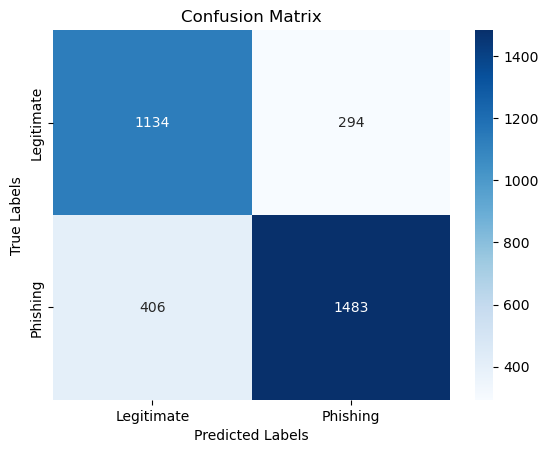

In [146]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

class_labels = ['Legitimate', 'Phishing']

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and tick parameters
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)

# Display the plot
plt.show()

In [145]:
# Use the model to predict probabilities for the testing data
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

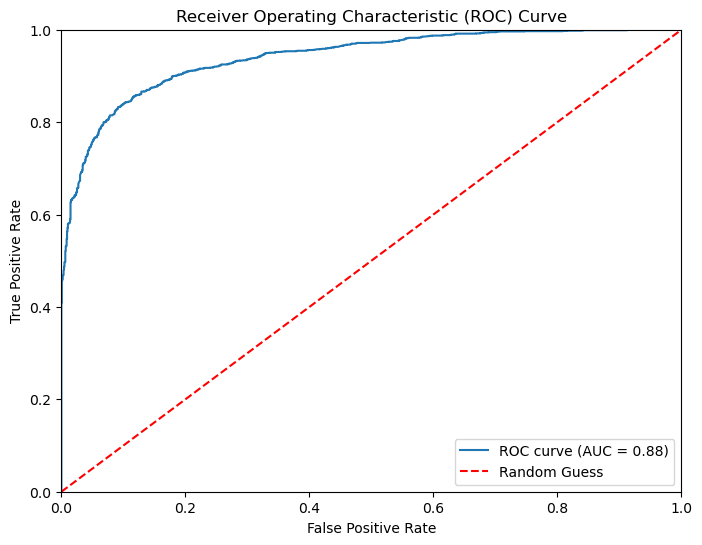

In [111]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Gradient Boosting Classifier

A powerful ensemble learning technique that uses boosting to sequentially create a series of models, where each model is designed to correct the mistakes made by the previous models.

Steps for Gradient Boosting Classifer:
1. Fit initial model
2. Calculate error residuals (predictive - actual values)
3. Fit new model based on error residuals
4. Update predictions by adding the previous predicitons to the new model predictions
5. Repeats steps 2-4 as many times as specified/desired

In [76]:
# Initialize random number generator
seed = 7
# Specify number of trees
num_trees = 100
# Create cross-validation and data will be split into 10 splits
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
# model is created 
model1 = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)

##### Evaluation Metrics

1. Accuracy Score per Fold - Metric of how well the model performs on the subsets of data.
2. ROC_AUC - Performance metric to evaluate the model on how it distinguishes between positive and negative classes. The ROC curve shows the true positive rate against the false positive rate.
3. Confusion Matrix - Table that describes the performance of the model by showing the predictions that are true positive, true negative, false positive, and false negative. 
4. Feature Importance - Metric to identify which indpendent variables are the most significant to the model's predictions.

In [77]:
# Obtain scores for each fold
results = model_selection.cross_val_score(model1, X, y, cv=kfold)

In [148]:
# Mean average accuracy for each fold
print(" Accuracy Score per Fold:",results.mean())

 Accuracy Score per Fold: 0.8613303822015661


In [118]:
# Fit model
model1 = model1.fit(X_train, y_train)

In [ ]:
# Extract y-values
y_scores = model1.predict_proba(X_test)[:, 1]
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# Calculate AUC
roc_auc = auc(fpr, tpr)

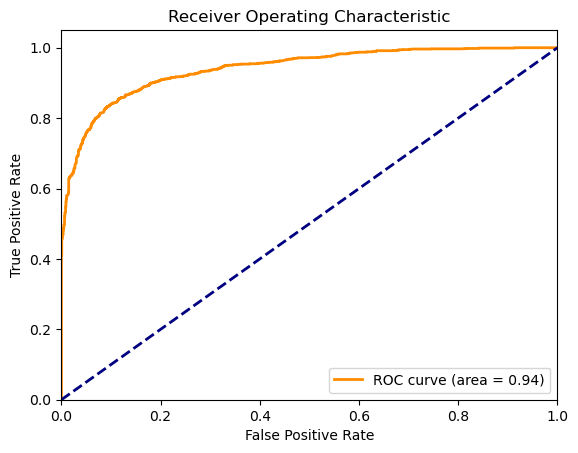

In [115]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

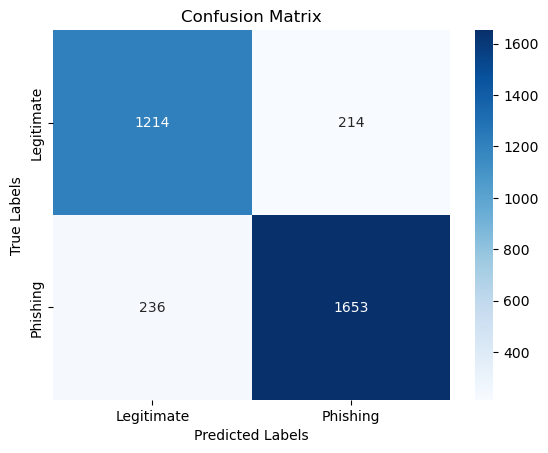

In [124]:
# Create a confusion matrix
y_pred1 = model1.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred1)

class_labels1 = ['Legitimate', 'Phishing']

sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and tick parameters
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(len(class_labels1)) + 0.5, labels=class_labels1)
plt.yticks(ticks=np.arange(len(class_labels1)) + 0.5, labels=class_labels1)

# Display the plot
plt.show()

In [ ]:
importances = model1.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]

# Create a list of feature names corresponding to the sorted importances
feature_names = list(X.columns[sorted_indices])

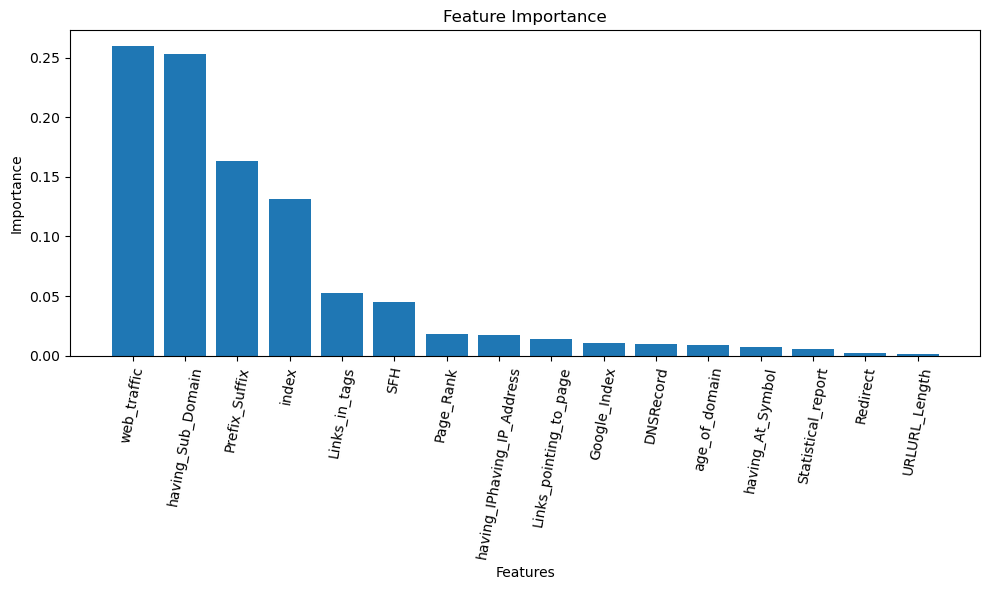

In [114]:
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), sorted_importances, align='center')
plt.xticks(range(len(importances)), feature_names, rotation=80)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

### Conclusion

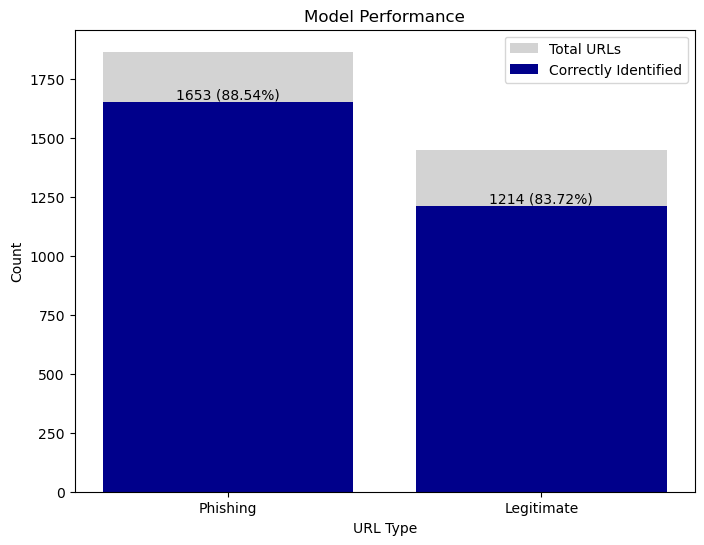

In [130]:
# Define the statistics
phishing_correct = 1653
phishing_total = 1867
legitimate_correct = 1214
legitimate_total = 1450

# Calculate the percentages
phishing_percent = (phishing_correct / phishing_total) * 100
legitimate_percent = (legitimate_correct / legitimate_total) * 100

# Create a bar chart
labels = ['Phishing', 'Legitimate']
correct_counts = [phishing_correct, legitimate_correct]
total_counts = [phishing_total, legitimate_total]

x = range(len(labels))

plt.figure(figsize=(8, 6))
plt.bar(x, total_counts, label='Total URLs', color='lightgray')
plt.bar(x, correct_counts, label='Correctly Identified', color='darkblue')

# Annotate each bar with the percentage value
for i in x:
    plt.text(x[i], correct_counts[i], f'{correct_counts[i]} ({round(correct_counts[i] / total_counts[i] * 100, 2)}%)',
             ha='center', va='bottom', color='black')

plt.xlabel('URL Type')
plt.ylabel('Count')
plt.title('Model Performance')
plt.xticks(x, labels)
plt.legend()
plt.show()



The GradientBoosting Classifier performed better than the logistic regression model in classifying the URLs as legitimate and phishing. The Area Under the Curve (AUC) of 0.94 indicates that the model can adequately classify between positive and negative classes. For the testing of the model, it was able to identify 1653 out of 1867 phishing URLs and 1214 out of 1450 legitimate URLs. 